In [1]:
from __future__ import print_function
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd
#from PlottingFunctions import plot_inertia, plot_silhouette

In [5]:
data_train = pd.read_csv('initial_condensed_data_TRAIN.csv')
tdata=data_train
#data_test = pd.read_csv('initial_dummied_data_TEST.csv')



In [6]:
list(data_train.columns)

['PID',
 'GrLivArea',
 'SalePrice',
 'MSSubClass',
 'LotArea',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'OverallQual',
 'YearBuilt',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinGdLvng',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'NoCentralAir',
 'NonStdElectrical',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'GeoRefNo',
 'Prop_Addr',
 'SchD_S',
 'LndAc_S',
 'Remodeled',
 'RemodelYrsAftBuilt',
 'GarageFinish_Fin',
 'GarageFinish_None',
 'GarageFinish_RFn',
 'UnpavedDrive',
 'WoodDeckBinary',
 'HasPorch',
 'FenceBinary',
 'OverallCondBinary',
 'Lat_Long',
 'Dist_From_UoI',
 'LotShape_IR',
 'SlopedLot']

Goal: pick a few features that I think houses w/in Neighborhood might have in common and then see which neighborhoods are more similar. Using only 4 variables

-sales price- big factor in how we want to group our similar neigborhoods is if they have simialr housing markets
-Grlivarea- maybe there are some nieghborhoods with bigger houses?
yearbuilt-id guess that there are older nieghborhoods and newer
-schd_s those in same school dist might be more similar
-'Dist_From_UoI' 

In [7]:
neighborhood_subset=tdata[['SalePrice',
 'GrLivArea',
 'YearBuilt',
 'SchD_S',
'Dist_From_UoI']] #,'Neighborhood',
neighborhood_subset_not_for_clustering=tdata[['SalePrice','Neighborhood',
 'GrLivArea',
 'YearBuilt',
 'SchD_S',
'Dist_From_UoI']]

In [8]:
neighborhood_subset.Dist_From_UoI[neighborhood_subset.Dist_From_UoI.isna()]=neighborhood_subset.Dist_From_UoI.mean()

<ipython-input-8-ae6922485912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhood_subset.Dist_From_UoI[neighborhood_subset.Dist_From_UoI.isna()]=neighborhood_subset.Dist_From_UoI.mean()
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [9]:
Inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(neighborhood_subset)
    Inertia.append(kmeanModel.inertia_)

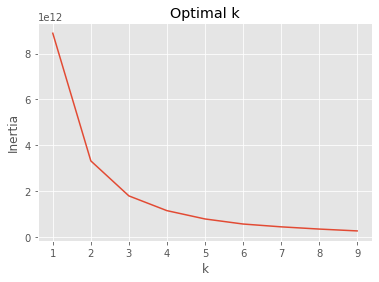

In [10]:

plt.plot(K, Inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Optimal k')
plt.show()

In [11]:
# hier.set_params(n_clusters=3)
# hier.fit(neighborhood_subset)

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df
linkage_df = linkage_frame(neighborhood_subset)
linkage_df

,row label 1,row label 2,distance,no. items in clust.
cluster 1,924.0,1482.0,0.000000,2.0
cluster 2,324.0,851.0,0.000998,2.0
cluster 3,63.0,128.0,0.005207,2.0
cluster 4,277.0,682.0,0.039466,2.0
cluster 5,735.0,1056.0,0.069189,2.0
...,...,...,...,...
cluster 1723,3443.0,3446.0,155002.059817,88.0
cluster 1724,3442.0,3447.0,165611.088561,1059.0
cluster 1725,3449.0,3450.0,291260.589502,663.0
cluster 1726,3448.0,3452.0,431261.840659,669.0


In [13]:
# row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
# plt.tight_layout()
# plt.ylabel('Euclidean distance')
# plt.show()

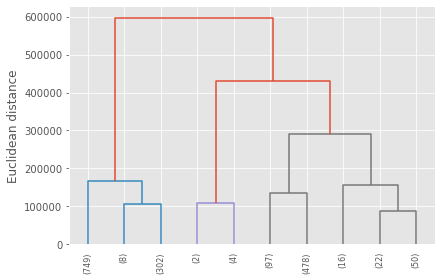

In [14]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p = 10, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


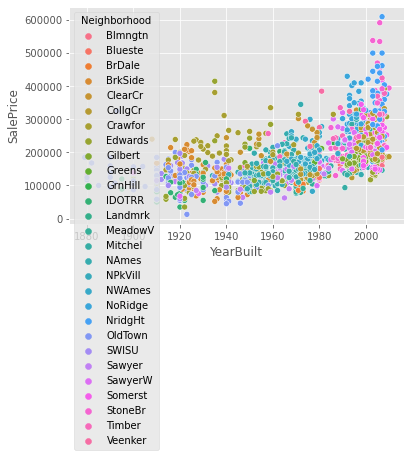

In [15]:
import seaborn as sns
sns.scatterplot( 'YearBuilt','SalePrice', data=neighborhood_subset_not_for_clustering, hue=neighborhood_subset_not_for_clustering.Neighborhood.astype('category'))

plt.show()

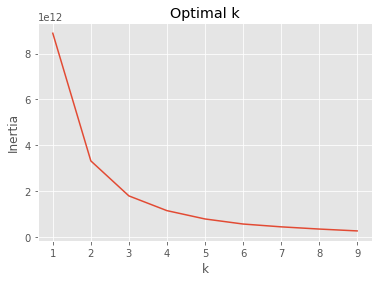

In [16]:
Inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(neighborhood_subset[['YearBuilt','SalePrice']])
    Inertia.append(kmeanModel.inertia_)
    
plt.plot(K, Inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Optimal k')
plt.show()

In [17]:
kmeans.set_params(n_clusters=3)
kmeans.fit(neighborhood_subset[['YearBuilt','SalePrice']])
label = kmeans.labels_
plt.scatter(neighborhood_subset.YearBuilt, neighborhood_subset.SalePrice, c=label, alpha=0.8)

plt.xlabel('Year')
plt.ylabel('SalePrice')
plt.show()

NameError: name 'kmeans' is not defined

In [18]:
#knn with each neighborhood as a poitn? w mean year built mean sale price mean of everything 

In [19]:
Neighborhood_as_instance=data_train.groupby(['Neighborhood']).mean()

In [27]:
#3 nas for small neighborhood dist to campus 

#greenhill- filling in dist from 'greenhill community' on google maps for avrg- 42.001852, -93.644843
#blueste- all insatnces on same block so filling that dist
#dorpping one obs landmaek cause idk where tf that is 


Neighborhood_as_instance.loc['Blueste'].Dist_From_UoI=1.8965486810548857
Neighborhood_as_instance.loc['GrnHill'].Dist_From_UoI=2.7595231852107758

In [28]:
Neighborhood_as_instance=Neighborhood_as_instance.drop(['Landmrk'])

KeyError: "['Landmrk'] not found in axis"

In [22]:
Neighborhood_as_instance.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'LotArea', 'OverallQual', 'YearBuilt',
       'MasVnrArea', 'BsmtExposure', 'BsmtFinGdLvng', 'BsmtUnfSF',
       'TotalBsmtSF', 'NoCentralAir', 'NonStdElectrical', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'GeoRefNo', 'SchD_S', 'LndAc_S', 'Remodeled',
       'RemodelYrsAftBuilt', 'GarageFinish_Fin', 'GarageFinish_None',
       'GarageFinish_RFn', 'UnpavedDrive', 'WoodDeckBinary', 'HasPorch',
       'FenceBinary', 'OverallCondBinary', 'Dist_From_UoI', 'LotShape_IR',
       'SlopedLot'],
      dtype='object')

In [23]:
#drop cols w any 0s

list([(Neighborhood_as_instance!= 0).all(axis=0)[(Neighborhood_as_instance!= 0).all(axis=0)]])

Neighborhood_as_instance=Neighborhood_as_instance[['GrLivArea','SalePrice','LotArea','OverallQual','YearBuilt','BsmtUnfSF','TotalBsmtSF','1stFlrSF','BsmtFullBath','FullBath','BedroomAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','LndAc_S','Dist_From_UoI']]

In [29]:
Neighborhood_as_instance

,GrLivArea,SalePrice,LotArea,OverallQual,YearBuilt,BsmtUnfSF,TotalBsmtSF,1stFlrSF,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,LndAc_S,Dist_From_UoI
Neighborhood,,,,,,,,,,,,,,,,
Blmngtn,1412.600000,194958.333333,3480.066667,7.066667,2005.133333,1028.066667,1318.800000,1412.600000,0.266667,2.000000,1.933333,6.266667,2.333333,492.800000,62033.333333,4.024951
Blueste,1184.428571,151428.571429,2637.428571,6.857143,1983.714286,398.142857,790.142857,799.857143,0.428571,1.285714,1.857143,4.857143,2.000000,496.571429,42342.857143,1.896549
BrDale,1137.863636,107397.727273,1865.636364,5.636364,1971.727273,286.772727,573.500000,573.500000,0.090909,1.181818,2.636364,5.772727,1.227273,312.000000,31786.363636,3.205190
BrkSide,1237.302632,127973.355263,7180.815789,5.210526,1931.263158,563.197368,759.868421,905.947368,0.250000,1.131579,2.605263,5.802632,1.171053,297.289474,40514.473684,1.880975
ClearCr,1806.074074,215216.000000,24720.259259,5.851852,1964.185185,485.370370,1194.962963,1434.777778,0.666667,1.703704,2.962963,6.962963,1.740741,478.888889,72007.222222,1.994534
CollgCr,1472.068323,198184.944099,10079.689441,6.633540,1996.683230,583.857143,1139.440994,1155.521739,0.515528,1.714286,2.826087,6.242236,1.993789,550.857143,61132.298137,3.462933
Crawfor,1733.400000,204939.030769,11836.123077,6.153846,1946.323077,514.876923,1054.338462,1267.815385,0.323077,1.492308,2.953846,6.984615,1.646154,424.676923,65946.153846,1.367717
Edwards,1304.165138,135552.486239,9984.623853,4.963303,1956.743119,431.715596,844.568807,1085.339450,0.366972,1.302752,2.816514,5.944954,1.302752,350.825688,42328.165138,1.757777
Gilbert,1641.291667,188711.718750,11895.145833,6.406250,1996.583333,580.812500,857.677083,929.479167,0.281250,1.958333,3.104167,7.052083,2.052083,449.197917,59348.958333,3.769144


In [30]:
linkage_df = linkage_frame(Neighborhood_as_instance)
linkage_df

,row label 1,row label 2,distance,no. items in clust.
cluster 1,7.0,21.0,362.802484,2.0
cluster 2,8.0,22.0,2328.960637,2.0
cluster 3,20.0,27.0,4524.829705,3.0
cluster 4,25.0,26.0,4625.768021,2.0
cluster 5,16.0,28.0,4727.260588,3.0
cluster 6,3.0,19.0,5017.845751,2.0
cluster 7,17.0,24.0,6050.861434,2.0
cluster 8,0.0,5.0,7421.621338,2.0
cluster 9,2.0,12.0,8424.677072,2.0
cluster 10,14.0,15.0,9446.146997,2.0


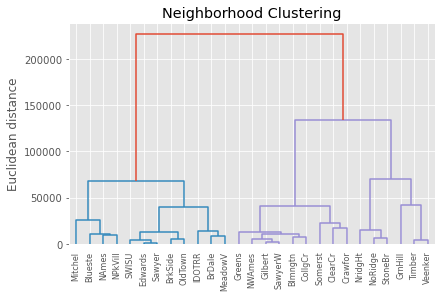

In [31]:
labelList=Neighborhood_as_instance.index

row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8,labels=labelList)
plt.tight_layout()
plt.title('Neighborhood Clustering')
plt.ylabel('Euclidean distance')
plt.show()


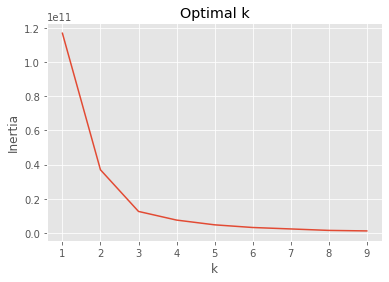

In [32]:
Inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Neighborhood_as_instance)
    Inertia.append(kmeanModel.inertia_)
    
plt.plot(K, Inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Optimal k')
plt.show()